# CS512 (AI) Lab Assignment - 1 

###**Due on: 6th Feb 2022 2400 Hrs | Total Marks: 100**

**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Armaan Garg, 2019CSZ0002@iitrpr.ac.in
*   Shivam Kainth shivam.20csz0006@iitrpr.ac.in

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment1 then you should name the colab file as: ABC_2019csx1234_Lab1.ipynb


The purpose of this assignment is to exercise your basic understanding of intelligent agents and state space search, and to help you apply these concepts.
In this assignment, you will be experimenting with different AI search techniques that has been discussed in class. You are provided with a starter code for this. The code consists of several segments, some of which you will need to read and understand to complete the assignment, and some of which you can ignore.


# Problem Statement 1 (60 marks)

##Save the world from Cersei Lannister (in a maze game setup).##

Story:
Melisandre, also known as red woman, was born in the city of Melony (this city lies in the centre of the maze world), and is known to have supernatural powers. She has been known to be lived for 2000 years and used her sorcery to save the world from evil lannisters. It has been recently known that her immortality comes from the pendant she wears and few wise men say that the owner can only live for a few seconds without the magical pendant.	
But on a very dark day, evil Cersei Lannister stole her pendant and hidden herself into an unknown city of labyrinths. Now it’s our time to save the world and find Cersei as soon as possible and return the pendant to Melisandre and return balance to the world. Thanks to AI this could be done in a very fast and efficient manner. 
Agent Jon Snow (the AI master) is put up to the task of finding the pendant. Thanks to agent Snow we came to know the location of where cercei is hiding and we also have the maze world map. But it will take ages for a person to reach there but with agent snow’s AI mastership this could be done in mere seconds. 
_______________________________________

The maze world is generated from empty grid and then adding walls of random length to random locations.

The goal is to find a path from corner to corner. Possible moves are Up, Down, Left or Right. Distance or length is measured with manhattan distance which is the sum of vertical and horizontal lengths.

Algorithms to compare to find a path :


*   BFS: breadth first search (10 marks)
*   DFS: depth first search  (10 marks)
*   UCS: Uniform-Cost Search  (10 marks)
*   IDS: Iterative Deepning Search (10 marks)
*   A* (A-star) heuristic Search (20 marks)


### Write code in Algorithm section below###

There are two performance metrics:

1.   Number of nodes explored
2.   Time taken for execution

###You need to plot graphs for both the metrics. Also, write your observations by pointing out the key differnces among the algorithms. (Use Graph plots & Observations section below to write your code)###

# The maze

In [ ]:
import numpy as np


def create_maze(size, n_walls, length_walls=0.3):
    maze = np.ones((size, size), dtype=bool)

    for i in range(n_walls):
        row, col = np.random.randint(0, size - 1, 2)

        wall = np.random.poisson(length_walls) * np.random.choice([-1, 1])

        if np.random.choice([True, False]):
            row = make_range(row, wall, size)
        else:
            col = make_range(col, wall, size)

        maze[row, col] = False

    maze[0, 0] = True
    maze[size - 1, size - 1] = True
    return maze


def make_range(start, length, m):
    d = np.clip(np.array([start + length, start]), 0, m - 1)
    return list(range(d.min(), d.max() + 1))
# SIZE = 10
# START = (0, 0) 
# GOAL = (SIZE - 1, SIZE - 1)
# OBSTACLE_COUNT = SIZE ** 2 // 30
# OBSTACLE_SIZE = 7
# maze = create_maze(SIZE, OBSTACLE_COUNT, OBSTACLE_SIZE)
# print(maze)

# Algorithm section

In [ ]:
"""
Write a function for each algorithm in this section
"""
import heapq
from collections import deque
from queue import heappop, heappush, deque
import numpy as np
from queue import PriorityQueue

def dfs(maze,start,goal):
    
    explored = []
    parents = {start: None}
    create_q=lambda start: [start]
    node_add=lambda queue, nodes: queue.extend(nodes)
    queue = create_q(start)
    finished = False
    while queue:
        s = queue.pop()
        #print("node is ",v)
        explored.append(s)
        if s == goal:
            finished = True
            break

        children = children_search(s, maze).difference(parents)
        
        for n in children:
            parents[n] = s
        node_add(queue, arrange(children))
        
    if not finished:
        path=None
    else:
        path=path_check(parents, start, goal)
    #explored=set(explored)
    assert len(explored) == len(set(explored))
    return finished, explored, path



def bfs(maze,start,goal):
    
    node_add=lambda queue, p: queue.extendleft(p)
    explored = []
    parents = {start: None}
    create_q=lambda p: deque([p])
    queue = create_q(start)

    finished = False
    while queue:
        s = queue.pop()
        #print("node is ",v)
        explored.append(s)
        if s == goal:
            finished = True
            break

        children = children_search(s, maze).difference(parents)
        node_add(queue, arrange(children))
        for n in children:
            parents[n] = s

        
    if not finished:
        path=None
    else:
        path=path_check(parents, start, goal)
    explored=set(explored)
    return finished, explored, path




def ucs(maze,start,goal):
    found, fringe, visited, came_from, cost_so_far = False, [(0, start)], set([start]), {start: None}, {start: 0}
    while not found and len(fringe):
        _, current = heappop(fringe)
        if current == goal: found = True; break
        for node in children_search(current,maze):
            new_cost = cost_so_far[current] + 1
            if node not in visited or cost_so_far[node] > new_cost:
                visited.add(node); came_from[node] = current; cost_so_far[node] = new_cost
                heappush(fringe, (new_cost, node))
    if found: 
        path=[0]*cost_so_far[goal]
        return found,came_from, path
    else: return found,came_from,None


def ids(maze,start,goal):
    found=False
    prev_iter_visited, depth = [], 0
    while True:
        found, fringe, visited, came_from = False, deque([(0, start)]), set([start]), {start: None}
        limit=-1
        while not found and len(fringe):
            depth, current = fringe.pop()
            if current == goal: found = True; break
            if limit == -1 or depth < limit:
                for node in children_search(current,maze):
                    if node not in visited and maze[node[0]][node[1]]==True:
                        visited.add(node); fringe.append((depth + 1, node))
                        came_from[node] = current
        if found or len(visited)==len(prev_iter_visited): break
        else: prev_iter_visited = visited; depth *= 2
    if found: 
            #print(datetime.now()-startT)
            traced_path=[0]*depth
            return found,visited,traced_path
    else: return found,visited,None




def astar(maze, start, goal, heuristic):

    start_to_current,heap, parents,explored = {start: 0},[(0, start)],{},[]

    finished = False
    while heap:
        k = heapq.heappop(heap)[1]

        explored.append(k)
        if k == goal:
            finished = True
            break

        children = children_search(k, maze)
        for p in arrange(children):
            new_d = start_to_current[k] + 1
            if new_d < start_to_current.get(p, float("inf")):
                start_to_current[p] = new_d
                heapq.heappush(heap, (new_d + heuristic(p),p))
                parents[p] = k

    if not finished:
        path=None
    else:
        path=path_check(parents, start, goal)

    return finished, explored, path

def children_search(node, maze):
    children = set()
    for i, j in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        a = node[0] + i
        b = node[1] + j
        if a < 0 or b < 0:
            continue

        try:
            d = maze[a][b]
            if d:
                children.add((a, b))
        except IndexError:
            pass

    return children


def arrange(g):
    g = list(g)
    np.random.shuffle(g)
    return g


def path_check(parents, start, goal):
    path = []
    a = goal
    while True:
        path.append(a)
        a = parents[a]
        if a == start:
            break

    return list(reversed(path))

def manhattan_heuristic(size):
    def z(x):
        return (size - 1 - x[0]) + (size - 1 - x[1])

    return z

# Execution section

In [ ]:
from collections import namedtuple #Like the dictionary type objects, it contains keys and that are mapped 
#to some values. In this case we can access the elements using keys and indexes.

from functools import partial # You can create partial functions in python by using the partial function from 
#the functools library. Partial functions allow one to derive a function with x parameters to a function 
#with fewer parameters and fixed values set for the more limited function.

from timeit import default_timer as timer
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tabulate #Tabulate is an open-source python package/module which is used to print 
#tabular data in nicely formatted tables

import tqdm
import os

np.random.seed(0)

SIZE = 100
START = (0, 0) 
GOAL = (SIZE - 1, SIZE - 1)
OBSTACLE_COUNT = SIZE ** 2 // 30
OBSTACLE_SIZE = 7

ALGOS = [
    ("DFS", partial(dfs, start=START, goal=GOAL)),
    ("BFS", partial(bfs, start=START, goal=GOAL)),
    ("UCS", partial(ucs, start=START, goal=GOAL)),
    ("IDS", partial(ids, start=START, goal=GOAL)),
    (
        "A-star",
        partial(astar, start=START, goal=GOAL, heuristic=manhattan_heuristic(SIZE)),
    ),
]

Result = namedtuple(
    "Result", ["round", "finished", "n_explored", "length_path", "seconds", "algo"]
)


def simulate(n, max_good_mazes=float("inf")):
    results = []
    good_mazes = []
    for i in tqdm.tqdm(range(n), mininterval=1):
        maze = create_maze(SIZE, OBSTACLE_COUNT, OBSTACLE_SIZE)
        for algo_name, algo in ALGOS:
            time_start = timer()
            finished, explored_nodes, path = algo(maze)
            time_end = timer()
            r = Result(
                round=i,
                finished=finished,
                n_explored=len(explored_nodes),
                length_path=None if not finished else len(path),
                seconds=time_end - time_start,
                algo=algo_name,
            )
            results.append(r)
            if finished and algo_name == ALGOS[0][0]:
                good_mazes.append(maze)
                if len(good_mazes) >= max_good_mazes:
                    break

    results_df = pd.DataFrame(results)
    return results_df, good_mazes

result_df, good_mazes = simulate(1000)

""" for reference to print the results in a table format"""

result_agg = result_df.groupby(["finished", "algo"])[
    "seconds", "n_explored", "length_path"
].mean()

result_agg["count"] = result_df.groupby(["finished", "algo"]).size()
result_agg = result_agg.reset_index()

print(tabulate.tabulate(result_agg.values, result_agg.columns, tablefmt="pipe"))




100%|██████████| 1000/1000 [02:24<00:00,  6.94it/s]

| finished   | algo   |   seconds |   n_explored |   length_path |   count |
|:-----------|:-------|----------:|-------------:|--------------:|--------:|
| False      | A-star | 0.0184891 |      2397.05 |       nan     |     429 |
| False      | BFS    | 0.01221   |      2397.05 |       nan     |     429 |
| False      | DFS    | 0.0123709 |      2397.05 |       nan     |     429 |
| False      | IDS    | 0.0274333 |      2397.05 |       nan     |     429 |
| False      | UCS    | 0.0135498 |      2397.05 |       nan     |     429 |
| True       | A-star | 0.0234397 |      2987.72 |       211.52  |     571 |
| True       | BFS    | 0.0360723 |      7104.2  |       211.52  |     571 |
| True       | DFS    | 0.0199516 |      3811.35 |       822.445 |     571 |
| True       | IDS    | 0.0214225 |      4117.89 |       786.312 |     571 |
| True       | UCS    | 0.0400649 |      7122.65 |       211.52  |     571 |



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


# Graph plots & Observations

---

Plot graphs related to the various parameters of algorithms for the various test cases given in the next section. 

1.   Plot one graph, which compares the number of nodes explored by every algorithm, while solving the problem.

2.  Plot another graph, comparing the total time taken by each algorithm to complete the execution. 

## Libraries for reference
https://seaborn.pydata.org/

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

https://matplotlib.org/stable/tutorials/introductory/pyplot.html


 


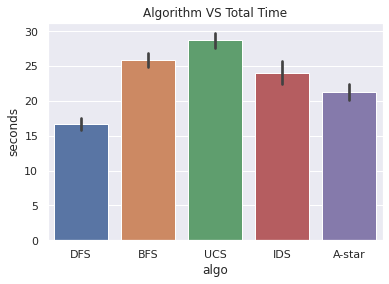

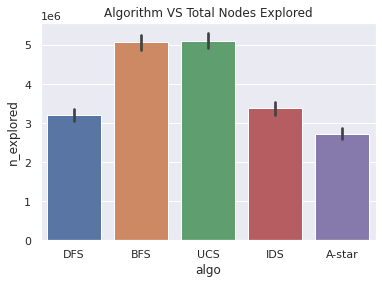

In [ ]:
""" graph plot code and observations"""
import matplotlib.pyplot as plt
import seaborn as sns
result_df2=result_df.drop(['round','finished','length_path'],axis=1)
algo_list=result_df2.groupby(["algo"])["algo"]
time_taken=result_df2.groupby(["algo"])["seconds"].sum()
#print(algo_list,time_taken,node_explored)
#print(result_df2)
sns.set(rc = {'figure.figsize':(6,4)})
#ax = sns.barplot(x=algo_list,y=time_taken)
ax = sns.barplot(x='algo',y='seconds',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Time")
plt.show()
print("================================================================================")
print("================================================================================")
ax = sns.barplot(x='algo',y='n_explored',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Nodes Explored")
plt.show()

### Test Case 1:


100%|██████████| 1000/1000 [02:25<00:00,  6.86it/s]


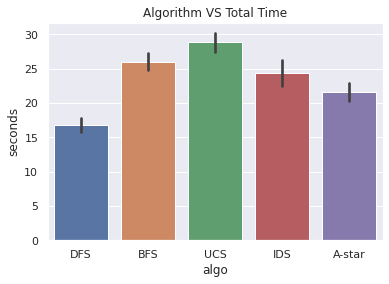

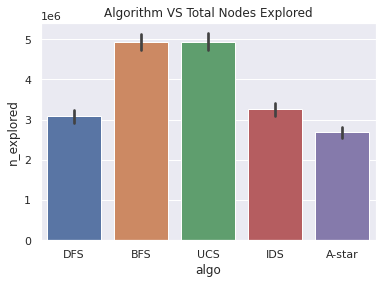

In [ ]:
START = (1, 1) 
GOAL = (SIZE - 1, SIZE - 1)
result_df, good_mazes = simulate(1000)
result_df2=result_df.drop(['round','finished','length_path'],axis=1)
sns.set(rc = {'figure.figsize':(6,4)})
ax = sns.barplot(x='algo',y='seconds',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Time")
plt.show()
print("================================================================================")
print("================================================================================")
ax = sns.barplot(x='algo',y='n_explored',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Nodes Explored")
plt.show()

### Test Case 2

100%|██████████| 1000/1000 [02:25<00:00,  6.88it/s]


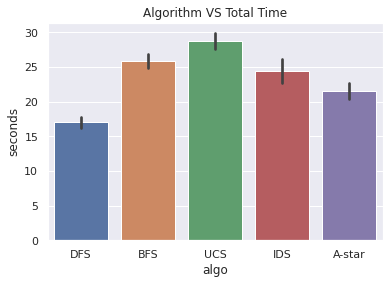

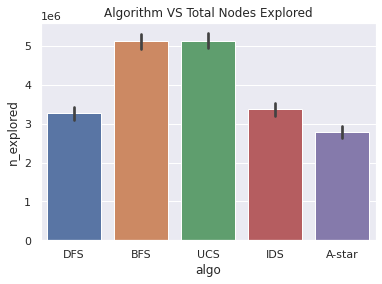

In [ ]:
START = (2, 0) 
GOAL = (SIZE - 1, SIZE - 1)
result_df, good_mazes = simulate(1000)
result_df2=result_df.drop(['round','finished','length_path'],axis=1)
sns.set(rc = {'figure.figsize':(6,4)})
ax = sns.barplot(x='algo',y='seconds',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Time")
plt.show()
print("================================================================================")
print("================================================================================")
ax = sns.barplot(x='algo',y='n_explored',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Nodes Explored")
plt.show()

### Test Case 3

100%|██████████| 1000/1000 [02:23<00:00,  6.96it/s]


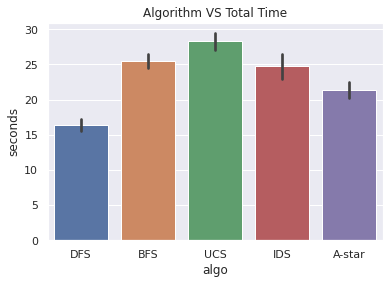

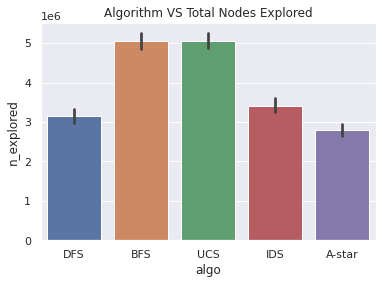

In [ ]:
START = (1, 0) 
GOAL = (SIZE - 2, SIZE - 1)
result_df, good_mazes = simulate(1000)
result_df2=result_df.drop(['round','finished','length_path'],axis=1)
sns.set(rc = {'figure.figsize':(6,4)})
ax = sns.barplot(x='algo',y='seconds',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Time")
plt.show()
print("================================================================================")
print("================================================================================")
ax = sns.barplot(x='algo',y='n_explored',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Nodes Explored")
plt.show()

### Test Case 4

100%|██████████| 1000/1000 [02:25<00:00,  6.89it/s]


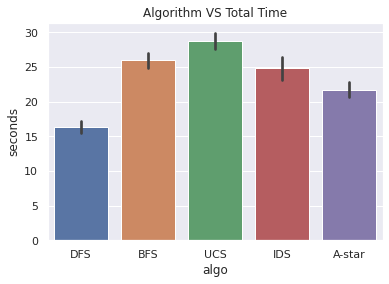

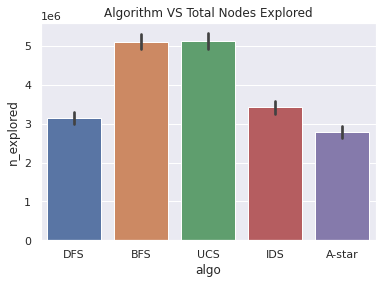

In [ ]:
START = (3, 0) 
GOAL = (SIZE - 1, SIZE - 2)
result_df, good_mazes = simulate(1000)
result_df2=result_df.drop(['round','finished','length_path'],axis=1)
sns.set(rc = {'figure.figsize':(6,4)})
ax = sns.barplot(x='algo',y='seconds',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Time")
plt.show()
print("================================================================================")
print("================================================================================")
ax = sns.barplot(x='algo',y='n_explored',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Nodes Explored")
plt.show()

### Test Case 5

100%|██████████| 1000/1000 [02:23<00:00,  6.97it/s]


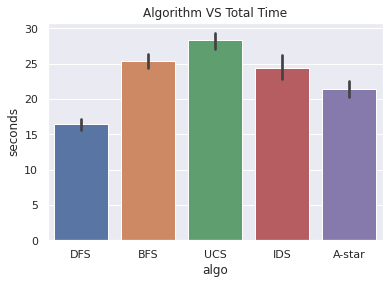

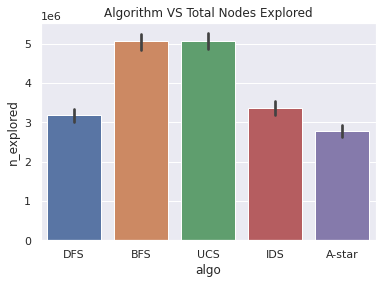

In [ ]:
START = (1, 3) 
GOAL = (SIZE - 1, SIZE - 3)
result_df, good_mazes = simulate(1000)
result_df2=result_df.drop(['round','finished','length_path'],axis=1)
sns.set(rc = {'figure.figsize':(6,4)})
ax = sns.barplot(x='algo',y='seconds',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Time")
plt.show()
print("================================================================================")
print("================================================================================")
ax = sns.barplot(x='algo',y='n_explored',data=result_df2,estimator=sum)
plt.title("Algorithm VS Total Nodes Explored")
plt.show()

From above observation what we can see that A* is comming out at top among all other search algorithm used here when we consider count of explored nodes means less space complexity but for less time complexity DFS runs faster than most of the algorithm. Although DFS in an uninformed search algorithm where as A* is a informed search algorithm. DFS algorithm is complete it means it gives us surity about finding a path but for A* even if path is there it sometimes cannot be able to find it as it works purely based on knowledge. It boils down to the decision of wheather you want better space or better time. It is evident that a bad heuristics can causes A* to perform bad. But unidirectional search with a consistent heuristic, A* does the fewest number of necessary expansions required to prove that the solution is optimal.

# Problem Statement 2 (40 marks)
## So many Queens, how to manage?

During a gladiatorial contests at the roman empire, a fine king invited all his queens to witness the valour of the gladiators. However, the queens were not in likings of one-another and must not see eye-to-eye. Your job as the "Minister of Strategies" in King's office is to create a sitting arrangement for all queens, while keeping in mind that no two queens are in the "LINE OF SIGHT" of one another i.e. the queens must be avoided to be in the same row or column or diagonally. 

 The "minister of Strategies" had recently enrolled in the Class of Artificial Intellignece CS 512 and decided to use A* algorithm to solve the problem.


Heuristic to be used for this problem is " Number of attacked queens", where if any new queen is placed in "LINE of ATTACK" of other queen, the Heuristic is incremented by 1, else it is unchanged. 

**Can you propose a better heuristic for this problem? If yes, then compare the performance of A* with your proposed and the given heuristic. [15 marks]**

The G(n) function can be defined as the number of queens which are correctly placed at the given time. 
For eg:
if the state is  
0 0 1 0

1 0 0 0

1 0 0 0

0 0 0 1 

then only one queen is correctly placed while, three queens are in ATTACK mode.
#### Reference image
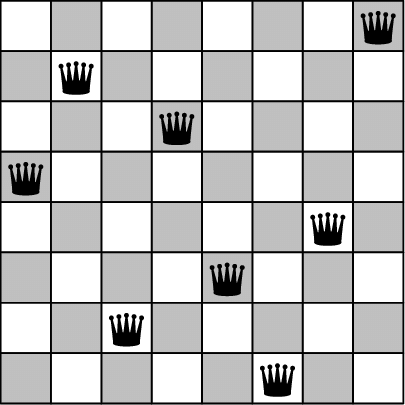


To solve this problem correctly. define the Heuristic function correctly, Apply A* agorithm to it and print the following information for each trial. Number of nodes explored, Optimal path cost, Total time taken for execution. [25 marks]

Consider in total, 5 trials,

 

---



1.   you have 4 queens in a 4x4 seating space.
2.   you have 5 queens in a 5x5 seating space.
3.   you have 6 queens in a 6x6 seating space.
4.  you have 7 queens in a 7x7 seating space.
5.  you have 8 queens in a 8x8 seating space.
5.  you have 9 queens in a 9x9 seating space.
5.  you have 10 queens in a 10x10 seating space.

----


In the end, plot a graph with all five trials in X-axis and following metrices in Y axis,
 * The number of nodes explored 
 * Optimnal path cost 
 * Total time taken by A* algorithm 

#### Trial 1: 4 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=4
for i in range(size):
  for j in range(size):
    arr[i][j]= 0



#### Trial 2: 5 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=5
for i in range(size):
  for j in range(size):
    arr[i][j]= 0


#### Trial 3: 6 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=6
for i in range(size):
  for j in range(size):
    arr[i][j]= 0


#### Trial 4: 7 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=7
for i in range(size):
  for j in range(size):
    arr[i][j]= 0


#### Trial 5: 8 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=8
for i in range(size):
  for j in range(size):
    arr[i][j]= 0


#### Trial 6: 9 queens

In [ ]:
# Code to generate a 2D grid world
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size= 9
for i in range(size):
  for j in range(size):
    arr[i][j]= 0

#### Trial 7: 10 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size= 10
for i in range(size):
  for j in range(size):
    arr[i][j]= 0

Define heuristics

In [ ]:
from copy import deepcopy
import random
from timeit import default_timer as timer
from queue import heappop, heappush, deque
def queen_heuristic(state,goal):
  #### Your code Here #####
    cost=0
    for i in range(len(state)):
        for j in range(len(state)):
            if i!=j and attacked(state[i],state[j]):
                cost+=1
                break
    return cost
def attacked(q1,q2):
    if (q1[0] == q2[0]) or (q1[1] == q2[1]) or (abs(q1[0] - q2[0]) == abs(q1[1] - q2[1])):
        return True
    else:
        return False
def get_children(side_length,queen_positions):
    children = []
    parent_queen_positions = list(queen_positions)
    for queen_index, queen in enumerate(parent_queen_positions):
        new_positions = [(queen[0], row) for row in range(side_length) if row != queen[1]]
        #print(new_positions)
        for new_position in new_positions:
            queen_positions = deepcopy(parent_queen_positions)
            queen_positions[queen_index] = new_position
            children.append(queen_positions)
    return children

Your solution using A*

In [ ]:
def astar_sol(state):
    step=0
    goal=[]
    visited=[]
    curr_cost=queen_heuristic(state,goal)
    curr_state=state
    heap=[(curr_cost,curr_state)]
    while len(heap):
        curr_cost,curr_state=heappop(heap)
        if curr_cost==0:
            # print("goal reached: ",curr_state)
            # for i in range(len(state)):
            #     for j in range(len(state)):
            #         if (i,j) in curr_state:
            #             print('Q',end=" ")
            #         else:
            #             print("_",end=" ")
            #     print("\n")
            return len(visited),step
            break
        new_states=get_children(len(state),curr_state)
        for i in new_states:
            if i not in visited:
                new_cost=queen_heuristic(i,goal)
                if new_cost<curr_cost:
                    #print(i,curr_cost,new_cost)
                    heappush(heap, (new_cost, i))
                    step+=1
                visited.append(i)
    return len(visited),step
def random_queen_position(side_length,queen_num):
    open_columns = list(range(side_length))
    queen_positions=[]
    while(len(open_columns)>0):
        random.seed()
        p=random.randrange(len(open_columns))
        p=open_columns.pop(p)
        q=random.randrange(side_length)
        queen_positions.append((p,q))
    return queen_positions

In [ ]:
explored,cost,total_time=[],[],[]
# Test case 1:
queen_positions1=random_queen_position(4,4)
time_start = timer()
s,t=astar_sol(queen_positions1)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.0006793550001020776 , Optimal path cost:  5 , Explored nodes:  12


In [ ]:
# Test case 2:
queen_positions2=random_queen_position(5,5)
time_start = timer()
s,t=astar_sol(queen_positions2)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.0034119459996873047 , Optimal path cost:  12 , Explored nodes:  37


In [ ]:
# Test case 3:
queen_positions3=random_queen_position(6,6)
time_start = timer()
s,t=astar_sol(queen_positions3)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.06224451599882741 , Optimal path cost:  36 , Explored nodes:  806


In [ ]:
# Test case 4:
queen_positions4=random_queen_position(7,7)
time_start = timer()
s,t=astar_sol(queen_positions4)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.04436256499866431 , Optimal path cost:  34 , Explored nodes:  584


In [ ]:
# Test case 5:
queen_positions5=random_queen_position(8,8)
time_start = timer()
s,t=astar_sol(queen_positions5)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.020320658000855474 , Optimal path cost:  19 , Explored nodes:  249


In [ ]:
# Test case 6:
queen_positions6=random_queen_position(9,9)
time_start = timer()
s,t=astar_sol(queen_positions6)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.04774169199845346 , Optimal path cost:  17 , Explored nodes:  514


In [ ]:
# Test case 7:
queen_positions7=random_queen_position(10,10)
time_start = timer()
s,t=astar_sol(queen_positions7)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.6616311249999853 , Optimal path cost:  78 , Explored nodes:  3439


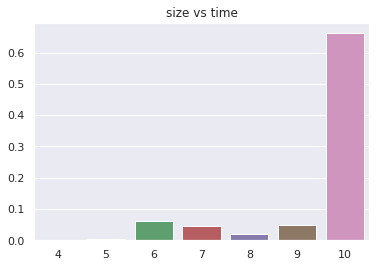

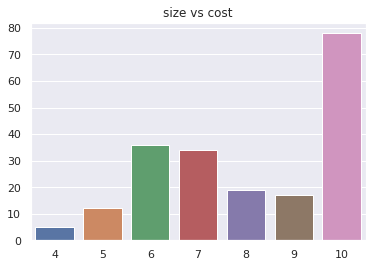

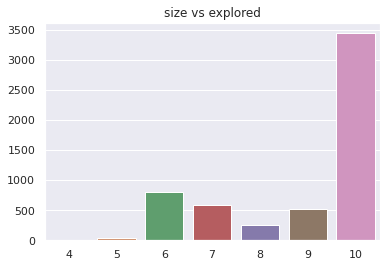

In [ ]:
import matplotlib.pyplot as plt
x=[4,5,6,7,8,9,10]
#print(len(total_time),len(cost),len(explored))
ax=sns.barplot(x=x,y=total_time)
plt.title("size vs time")
plt.show()
ax=sns.barplot(x=x,y=cost)
plt.title("size vs cost")
plt.show()
ax=sns.barplot(x=x,y=explored)
plt.title("size vs explored")
plt.show()
# x=[4,5,6,7,8,9,10]
# #print(len(total_time),len(cost),len(explored))
# plt.plot(x, total_time, color='r', label='Time')
# plt.plot(x, cost, color='g', label='Cost')
# plt.plot(x, explored, color='b', label='Explored Nodes')
# plt.xlabel("Trails")
# plt.ylabel("Magnitude")
# plt.title("Explored Nodes, Time and Optimal Cost with respect to each Trails")
# plt.legend()
# plt.show()

In [ ]:
def queen_attacks(queen_positions):

        def range_between(a, b):
            if a > b:
                return range(a - 1, b, -1)
            elif a < b:
                return range(a + 1, b)
            else:
                return [a]

        def zip_repeat(a, b):
            if len(a) == 1:
                a = a * len(b)
            elif len(b) == 1:
                b = b * len(a)
            return zip(a, b)

        # Finds all the points in between two points
        def points_between(a, b):
            return zip_repeat(list(range_between(a[0], b[0])), list(range_between(a[1], b[1])))

        # Checks if the two pair of coordinates(2 queens) are attacking each other or not,
        # also checks if there are queens in between which are also in attacking position
        # Returns True/False
        def is_attacking(queens, a, b):
            if (a[0] == b[0]) or (a[1] == b[1]) or (abs(a[0] - b[0]) == abs(a[1] - b[1])):
                for between in points_between(a, b):
                    if between in queens:
                        return False
                return True
            else:
                return False

        attacking_pairs = []
        queen_positions = list(queen_positions)
        left_to_check = deepcopy(queen_positions)
        while left_to_check:
            a = left_to_check.pop()
            for b in left_to_check:
                if is_attacking(queen_positions, a, b):
                    attacking_pairs.append([a, b])
        # Returns length of all the attacking pairs
        return len(attacking_pairs)
def new_heuristic(state,goal): # defining a new heuristics 
    cost=0
    # for i in range(len(state)):
    #     for j in range(len(state)):
    #         if state[i]!=state[j] and attacked(state[i],state[j]):
    #             cost+=1
    return queen_attacks(state)

In [ ]:
def astar_sol(state):
    step=0
    goal=[]
    visited=[]
    curr_cost=new_heuristic(state,goal)
    curr_state=state
    heap=[(curr_cost,curr_state)]
    while len(heap):
        curr_cost,curr_state=heappop(heap)
        if curr_cost==0:
            # print("goal reached: ",curr_state)
            # for i in range(len(state)):
            #     for j in range(len(state)):
            #         if (i,j) in curr_state:
            #             print('Q',end=" ")
            #         else:
            #             print("_",end=" ")
            #     print("\n")
            return len(visited),step
            break
        new_states=get_children(len(state),curr_state)
        for i in new_states:
            if i not in visited:
                new_cost=new_heuristic(i,goal)
                if new_cost<curr_cost:
                    #print(i,curr_cost,new_cost)
                    heappush(heap, (new_cost, i))
                    step+=1
                visited.append(i)
    return len(visited),step

In [ ]:
explored,cost,total_time=[],[],[]
time_start = timer()
s,t=astar_sol(queen_positions1)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)
# queen_positions7=random_queen_position(10,10)
# time_start = timer()
# s,t=astar_sol(queen_positions7)
# time_end=timer()
# print("For 10X10 board Number f visited nodes: ",s,", Optimal path cost: ",t,", time: ",time_end-time_start)

Time taken:  0.0010085960002470529 , Optimal path cost:  5 , Explored nodes:  12


In [ ]:
time_start = timer()
s,t=astar_sol(queen_positions2)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.004558552998787491 , Optimal path cost:  4 , Explored nodes:  53


In [ ]:
time_start = timer()
s,t=astar_sol(queen_positions3)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.06999457200072356 , Optimal path cost:  35 , Explored nodes:  620


In [ ]:
time_start = timer()
s,t=astar_sol(queen_positions4)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.046604221999587025 , Optimal path cost:  21 , Explored nodes:  352


In [ ]:
time_start = timer()
s,t=astar_sol(queen_positions5)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.058357462999993004 , Optimal path cost:  34 , Explored nodes:  437


In [ ]:
time_start = timer()
s,t=astar_sol(queen_positions6)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.10071367700038536 , Optimal path cost:  30 , Explored nodes:  697


In [ ]:
time_start = timer()
s,t=astar_sol(queen_positions7)
time_end=timer()
total_time.append(time_end-time_start)
explored.append(s)
cost.append(t)
print("Time taken: ",time_end-time_start,", Optimal path cost: ",t,", Explored nodes: ",s)

Time taken:  0.07491171900073823 , Optimal path cost:  78 , Explored nodes:  492


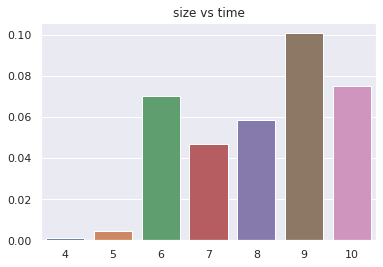

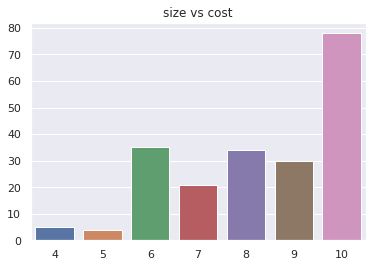

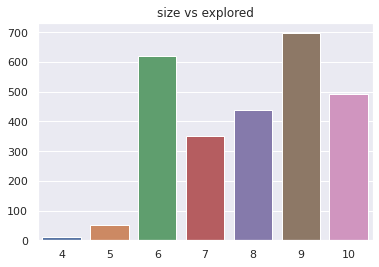

In [ ]:
import seaborn as sns
x=[4,5,6,7,8,9,10]
#print(len(total_time),len(cost),len(explored))
ax=sns.barplot(x=x,y=total_time)
plt.title("size vs time")
plt.show()
ax=sns.barplot(x=x,y=cost)
plt.title("size vs cost")
plt.show()
ax=sns.barplot(x=x,y=explored)
plt.title("size vs explored")
plt.show()
# plt.plot(x, total_time, color='r', label='Time')
# plt.plot(x, cost, color='g', label='Cost')
# plt.plot(x, explored, color='b', label='Explored Nodes')
# plt.xlabel("Trails")
# plt.ylabel("Magnitude")
# plt.title("Explored Nodes, Time and Optimal Cost with respect to each Trails")
# plt.legend()
# plt.show()